In [1]:
clear all
set more off
macro drop _all
set seed 8675309
set linesize 100
set scheme dubois, permanently







(set scheme preference recorded)


In [2]:
%set graph_format svg --permanently

In [4]:
import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("AGIEFC") firstrow clear
label define AGI_lab 1 "$100-30,000" 2 "$30,001-48,000" 3 "$48,001-75,000" 4 "$75,001-110,000" 5 "$110,001-497,686" 
label values AGI AGI_lab
label define EFC_lab 1 "$0" 2 "$1-2,599" 3 "$2,600-7,199" 4 "$7,200-15,599" 5 "$15,600 or more" 
label values EFC EFC_lab


(9 vars, 40 obs)






In [5]:
quietly set obs `=60'
quietly gen race=4
quietly replace race=3 if _n<56
quietly replace race=1 if _n<51
quietly replace race=2 if _n<46
label define race 1 "Black" 2 "white" 3 "Latinx" 4 "Asian"
label values race race
quietly gen efc=1
quietly replace efc=2 if _n==42 | _n==47 | _n==42 | _n==57
quietly replace efc=3 if _n==43 | _n==48 | _n==43 | _n==58
quietly replace efc=4 if _n==44 | _n==49 | _n==44 | _n==59
quietly replace efc=5 if _n==45 | _n==50 | _n==45 | _n==60
quietly label define efc 1 "$0" 2 "$1-2,599" 3 "$2,600-7,199" 4 "$7,200-15,599" 5 "$15,600 +"
quietly label values efc efc
quietly gen pcthelp=11.6368 if _n==41
quietly replace pcthelp=8.632 if _n==46
quietly replace pcthelp=13.0130 if _n==51
quietly replace pcthelp=9.3606 if _n==56
quietly replace pcthelp=15.2168 if _n==42
quietly replace pcthelp=11.3907 if _n==47
quietly replace pcthelp=15.0896 if _n==52
quietly replace pcthelp=22.6309 if _n==57
quietly replace pcthelp=16.0815 if _n==43
quietly replace pcthelp=7.6035 if _n==48
quietly replace pcthelp=15.4896 if _n==53
quietly replace pcthelp=22.4566 if _n==58
quietly replace pcthelp=21.5403 if _n==44
quietly replace pcthelp=9.5468 if _n==49
quietly replace pcthelp=18.0492 if _n==54
quietly replace pcthelp=. if _n==59
quietly replace pcthelp=25.6239 if _n==45
quietly replace pcthelp=30.1301 if _n==50
quietly replace pcthelp=16.1942 if _n==55
quietly replace pcthelp=. if _n==60

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. cap noi graph hbar Debt_ratio_EFC, over(EFC, gap(30)) ytitle("") asyvars showyvars xsize(10) ysize
> (5)  by(Race_Ethnicity, legend(off) title("Debt to principle ratio over EFC", span position(11)) n
> ote("", size(small) position(2))) name(EFC)

. if _rc == 0 {
.     noi gr export c:/data/graph$stata_kernel_graph_counter.svg, width(600) replace


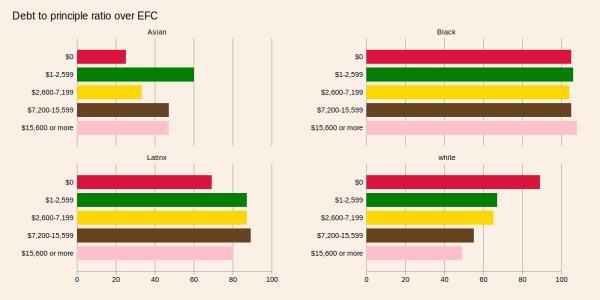

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. cap noi graph hbar pcthelp, over(efc, gap(30)) ytitle("") asyvars showyvars scheme(dubois) xsize(1
> 0) ysize(5) by(race, legend(off) title("% receiving help repaying debt by Expected Family Contribu
> tion", span position(11)) note(" " "This is a note about our cool student debt graphs blah blah bl
> ah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah bla
> h blah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah
>  blah blah blah blah""say some things about your dubois style elements.", size(small) position(2))
> ) name(PCTHELP)

. if _rc == 0 {
.     noi gr export c:/data/graph$stata_kernel_graph_counter.svg, width(600) replace


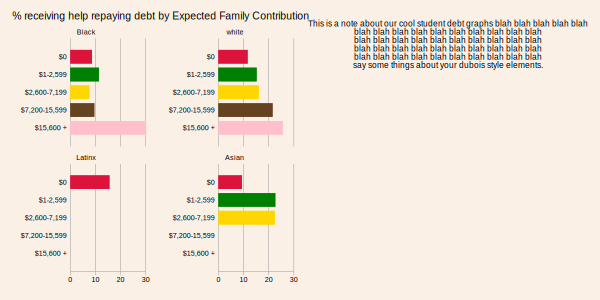

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. . `edb245b4b332c571575c9c2e728a81ac'
. cap noi graph combine AGI EFC PCTHELP

. if _rc == 0 {
.     noi gr export c:/data/graph$stata_kernel_graph_counter.svg, width(600) replace


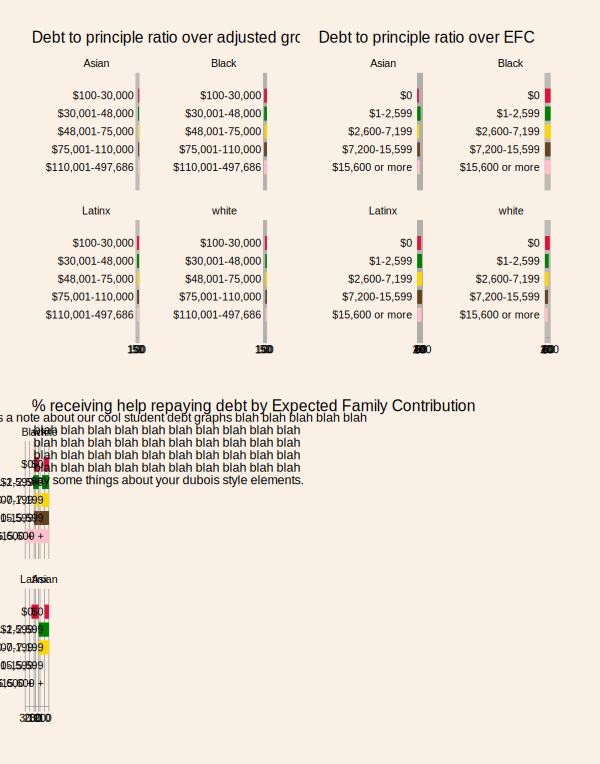

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. `c2357a8691800b66472c2f1218666685'
. list AGI EFC pcthelp

     +----------------------------------------------+
     |              AGI               EFC   pcthelp |
     |----------------------------------------------|
  1. |      $100-30,000                 .         . |
  2. |      $100-30,000                 .         . |
  3. |      $100-30,000                 .         . |
  4. |      $100-30,000                 .         . |
  5. |   $30,001-48,000                 .         . |
     |----------------------------------------------|
  6. |   $30,001-48,000                 .         . |
  7. |   $30,001-48,000                 .         . |
  8. |   $30,001-48,000                 .         . |
  9. |   $48,001-75,000                 .         . |
 10. |   $48,001-75,000                 .         . |
     |----------------------------------------------|
 11. |   $48,001-75,000               

In [9]:
list AGI EFC pcthelp

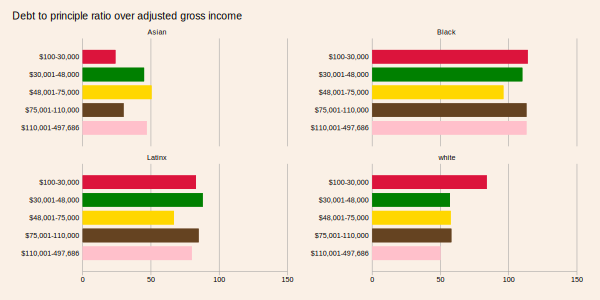

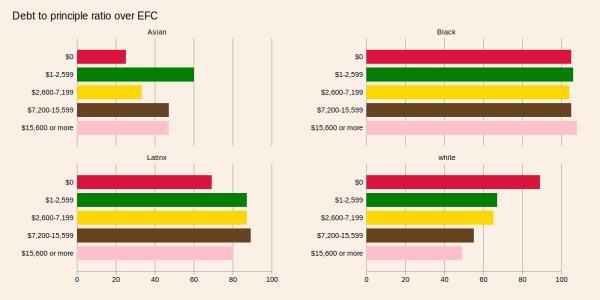

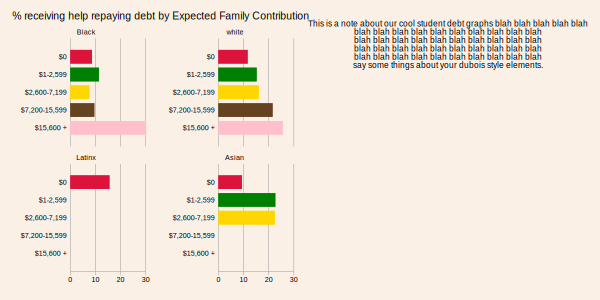

In [11]:
graph hbar Debt_ratio_AGI, over(AGI, gap(30)) ytitle("") asyvars showyvars xsize(10) ysize(5)  by(Race_Ethnicity, legend(off) title("Debt to principle ratio over adjusted gross income", span position(11)) note("", size(small) position(2))) name(AGI, replace)
graph hbar Debt_ratio_EFC, over(EFC, gap(30)) ytitle("") asyvars showyvars xsize(10) ysize(5)  by(Race_Ethnicity, legend(off) title("Debt to principle ratio over EFC", span position(11)) note("", size(small) position(2))) name(EFC, replace)
graph hbar pcthelp, over(efc, gap(30)) ytitle("") asyvars showyvars scheme(dubois) xsize(10) ysize(5) by(race, legend(off) title("% receiving help repaying debt by Expected Family Contribution", span position(11)) note(" " "This is a note about our cool student debt graphs blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""say some things about your dubois style elements.", size(small) position(2))) name(PCTHELP, replace)

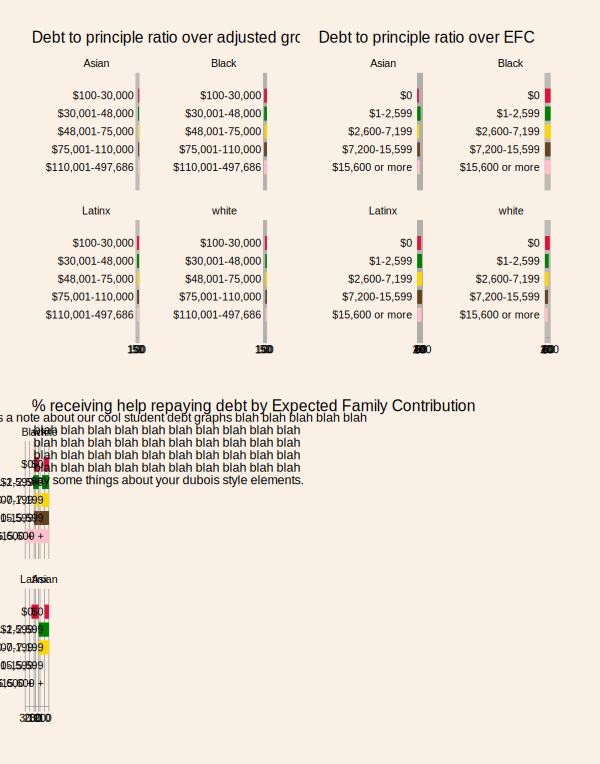

In [12]:
graph combine AGI EFC PCTHELP